In [145]:
import fcnn
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import torch
from torch import nn, Tensor
from os import path
from data.loaders import SteelLoader

In [146]:
data_source = "steel_simple_results/lr-0.0001-05.07.23-10.45/"
checkpoint = "epoch8state.torch"

In [147]:
epoch_losses = []
with open(path.join(data_source, "train_losses.txt"), "r") as tloss:
    epoch_losses=tloss.readlines()
    epoch_losses = [float(l) for l in epoch_losses]

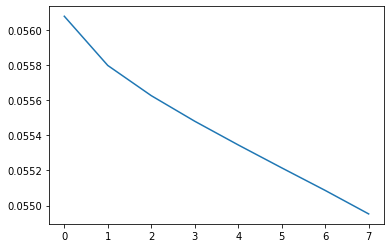

In [148]:
plt.figure()
plt.plot(epoch_losses)
plt.show()
plt.close()

In [149]:
network = fcnn.SimpleFCN(dim_out=5)
network.load_state_dict(torch.load(path.join(data_source, checkpoint),
                                    map_location=torch.device("cpu")))
network.eval()

steel_train = SteelLoader(train = False)

In [150]:
steel_train.shuffle()
for x, y in tqdm(steel_train):
    y_pred = network(x)
    break
    # other metrics here

  0%|          | 0/45 [00:00<?, ?it/s]

In [151]:
img_ind = 2
img = x[img_ind]
target_labels = y[img_ind].detach()
predicted_labels = y_pred[img_ind].detach()

In [152]:
def plot_img(arr):
    if len(arr.shape) == 3 and arr.shape[0] > 1:
        arr = np.sum(np.array(arr)[:4], axis = 0)
    plt.figure()
    plt.imshow(arr, cmap="gray")
    plt.show()
    plt.close()

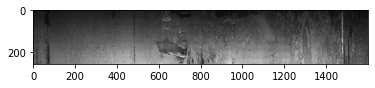

channel  0


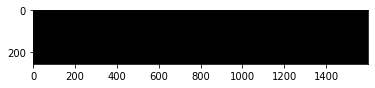

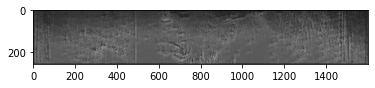

channel  1


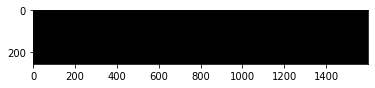

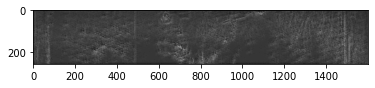

channel  2


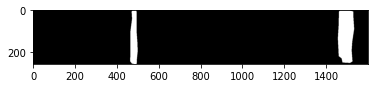

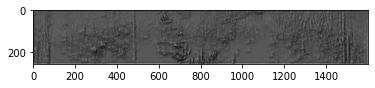

channel  3


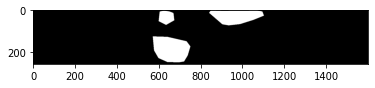

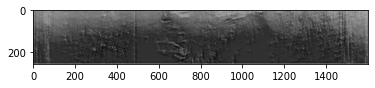

channel  4


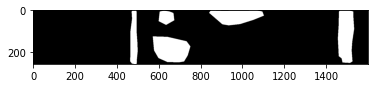

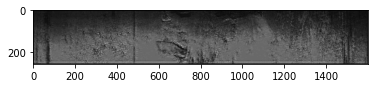

In [153]:
plot_img(img)
for channel in range(5):
    print("channel ", channel)
    plot_img(target_labels[channel])
    plot_img(predicted_labels[channel])